### Import libraries and module

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score,roc_curve, roc_auc_score, auc 
from sklearn.model_selection import cross_val_score, StratifiedKFold, LeaveOneOut

# import custom module 
import data_preprocessing as dpp

Number of Low Cases: 303 (30.30%)
Number of Medium Cases: 332 (33.20%)
Number of High Cases: 365 (36.50%)


<Figure size 2500x2500 with 1 Axes>

70.00% in training set
30.00% in test set
70.00% in training set
30.00% in test set


# Section 1: Model training by random forest classifier  with all features

In [2]:
#creating model object
rfc_model = RandomForestClassifier(n_estimators=100)

# fit model
rfc_model.fit(dpp.F_train, dpp.P_train.ravel())

RandomForestClassifier()

### Prediction results 

In [3]:
rfc_model_prediction_from_trained_data = rfc_model.predict(dpp.F_train)
rfc_model_prediction_from_test_data = rfc_model.predict(dpp.F_test)

# get current accuracy of the model
rfc_model_accuracy_from_trained_data = metrics.accuracy_score(dpp.P_train, rfc_model_prediction_from_trained_data)
rfc_model_accuracy_from_test_data = metrics.accuracy_score(dpp.P_test, rfc_model_prediction_from_test_data)

In [4]:
#output 
print ("Accuracy from trained data of rfc model is : {0:.4f}%".format(rfc_model_accuracy_from_trained_data*100))
print ("Accuracy from test data of rfc model is : {0:.4f}%".format(rfc_model_accuracy_from_test_data*100))

Accuracy from trained data of rfc model is : 100.0000%
Accuracy from test data of rfc model is : 100.0000%


### Cross Validation

#### k-Fold Cross Validation

In [5]:
kF_cv_score = cross_val_score(rfc_model,dpp.F,dpp.P.ravel(),cv=10)

In [6]:
kF_cv_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
kF_cv_score.mean()*100

100.0

#### Stratified cross validation 

In [8]:
SFKF = StratifiedKFold(n_splits=5)
SFKF_cv_score = cross_val_score(rfc_model,dpp.F,dpp.P.ravel(),cv=SFKF)

In [9]:
SFKF_cv_score

array([1., 1., 1., 1., 1.])

In [10]:
SFKF_cv_score.mean()*100

100.0

#### LeaveOneOut cross validation

In [11]:
loo_validation = LeaveOneOut()
LOO_cv_score = cross_val_score(rfc_model,dpp.F,dpp.P.ravel(),cv=loo_validation)

In [12]:
LOO_cv_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [13]:
LOO_cv_score.mean()*100

100.0

### Performance metrics

#### Confusion matrix

confusion matrix for trained data :
[[214   0   0]
 [  0 236   0]
 [  0   0 250]]
confusion matrix for test data :
[[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


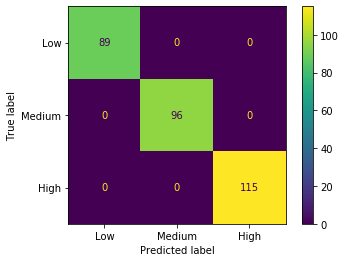

In [14]:
print("confusion matrix for trained data :")
print(metrics.confusion_matrix(dpp.P_train, rfc_model_prediction_from_trained_data))

print("confusion matrix for test data :")
cm = metrics.confusion_matrix(dpp.P_test, rfc_model_prediction_from_test_data)

print(cm)

cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low","Medium","High"])
cmd.plot()
plt.show()

#### Classification report

In [15]:
print("classification report for trained data :")
print(metrics.classification_report(dpp.P_train, rfc_model_prediction_from_trained_data))

print("classification report for test data :")
print(metrics.classification_report(dpp.P_test, rfc_model_prediction_from_test_data))

classification report for trained data :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       214
           2       1.00      1.00      1.00       236
           3       1.00      1.00      1.00       250

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

classification report for test data :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### ROC Curve with all features

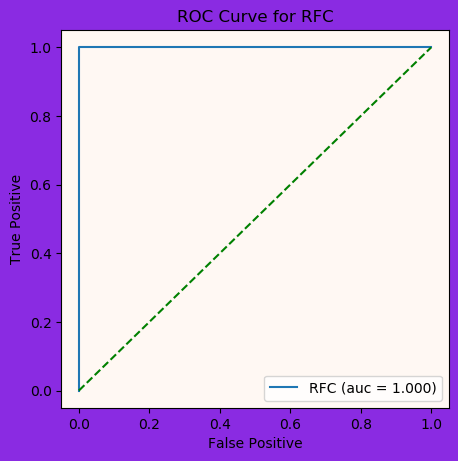

In [16]:
rfc_model_roc = rfc_model.predict_proba(dpp.F_test)
fpr, tpr, threshold = roc_curve(dpp.P_test, rfc_model_roc[:,1], pos_label=2)
auc_value = auc(fpr, tpr)
fig = plt.figure(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor('#8a2be2')
ax = plt.gca()
ax.set_facecolor("#FFF8F3")
plt.plot(fpr,tpr, linestyle='-', label='RFC (auc = %0.3f)' % auc_value)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve for RFC")
plt.show()

# Section 2: Model training by logistic regression classifier  with all features

In [17]:
#creating model object
rfc_model_wsf = RandomForestClassifier(n_estimators=100)

# fit model
rfc_model_wsf.fit(dpp.F_selec_train, dpp.P_selec_train.ravel())

RandomForestClassifier()

### Prediction results 

In [18]:
rfc_model_wsf_prediction_from_trained_data = rfc_model_wsf.predict(dpp.F_selec_train)
rfc_model_wsf_prediction_from_test_data = rfc_model_wsf.predict(dpp.F_selec_test)

# get current accuracy of the model
rfc_model_wsf_accuracy_from_trained_data = accuracy_score(dpp.P_selec_train, rfc_model_wsf_prediction_from_trained_data)
rfc_model_wsf_accuracy_from_test_data = accuracy_score(dpp.P_selec_test, rfc_model_wsf_prediction_from_test_data)

In [19]:
#output 
print ("Accuracy from trained data of rfc model is : {0:.4f}%".format(rfc_model_wsf_accuracy_from_trained_data*100))
print ("Accuracy from test data of rfc model is : {0:.4f}%".format(rfc_model_wsf_accuracy_from_test_data*100))

Accuracy from trained data of rfc model is : 100.0000%
Accuracy from test data of rfc model is : 100.0000%


### Performance Metrics

#### Confusion matrix

confusion matrix for train data :
[[214   0   0]
 [  0 236   0]
 [  0   0 250]]
confusion matrix for test data :
[[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


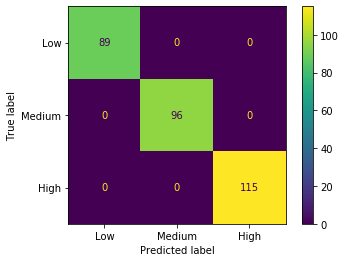

In [20]:
#confusion matrix
print("confusion matrix for train data :")
print(confusion_matrix(dpp.P_selec_train, rfc_model_wsf_prediction_from_trained_data))


print("confusion matrix for test data :")
cm = metrics.confusion_matrix(dpp.P_test, rfc_model_wsf_prediction_from_test_data)

print(cm)

cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low","Medium","High"])
cmd.plot()
plt.show()

#### Classification report

In [21]:
print("classification report for trained data :")
print(classification_report(dpp.P_selec_train, rfc_model_wsf_prediction_from_trained_data))

print("classification report for test data :")
print(classification_report(dpp.P_selec_test, rfc_model_wsf_prediction_from_test_data))

classification report for trained data :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       214
           2       1.00      1.00      1.00       236
           3       1.00      1.00      1.00       250

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

classification report for test data :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### ROC Curve with selected feature

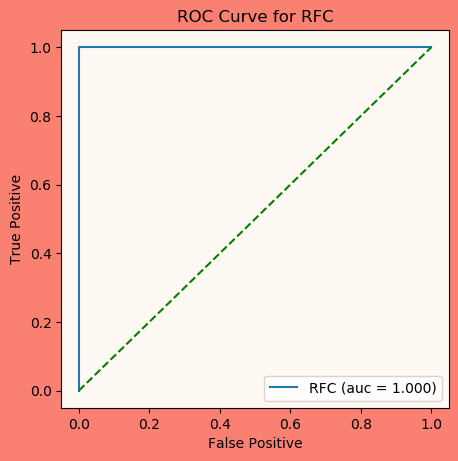

In [22]:
rfc_model_wsf_roc = rfc_model_wsf.predict_proba(dpp.F_selec_test)
fpr_wsf, tpr_wsf, threshold_wsf = roc_curve(dpp.P_selec_test, rfc_model_wsf_roc[:,1], pos_label=2)
auc_value_wsf = auc(fpr_wsf, tpr_wsf)
fig = plt.figure(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor('#fa8072')
ax = plt.gca()
ax.set_facecolor("#FFF8F3")
plt.plot(fpr_wsf,tpr_wsf, linestyle='-', label='RFC (auc = %0.3f)' % auc_value_wsf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve for RFC")
plt.show()